# **Project: Predict Medical Charge Using Multiple Linear Regression Method**

# 1. Introduction
### Background
In health care system, accurately predicting medical cost of individuals can not only help determine insurance cost but also guide patients for choosing the right insurance plan. It is highly useful for properly advocating limited healthcare resources. 

### Objectives
Build multiple linear regression models for predicting healthcare cost of individuals with relevant variables (age,sex, bmi, children, smoker, and region).

# 2. Methods
+ Exploratory Data Analysis (EDA)
+ Data Cleaning
+ Model Building 
+ Summary

# 3. EDA

In [7]:
library(tidyverse)
library(mice)
library(plyr)
library(VIM)
library(car)

### Import Data

In [16]:
df <- read_csv("insurance.csv")
print(df)

Rows: 1338 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): sex, smoker, region
dbl (4): age, bmi, children, charges

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 1,338 × 7
     age sex      bmi children smoker region    charges
   <dbl> <chr>  <dbl>    <dbl> <chr>  <chr>       <dbl>
 1    19 female  27.9        0 yes    southwest  16885.
 2    18 male    33.8        1 no     southeast   1726.
 3    28 male    33          3 no     southeast   4449.
 4    33 male    22.7        0 no     northwest  21984.
 5    32 male    28.9        0 no     northwest   3867.
 6    NA female  25.7        0 no     southeast   3757.
 7    46 female  33.4        1 no     southeast   8241.
 8    NA female  27.7        3 no     northwest   7282.
 9    37 male    29.8        2 no     northeast   6406.
10    60 female  25.8        0 no     northwest  28923.
# ℹ 1,328 more rows


### Data Summary

In [18]:
age <- df$age
sex <- df$sex
bmi <- df$bmi
children <- df$children
smoker <- df$smoker
region <- df$region
charges <- df$charges
print("Summary for continuous variables:")
summary(df[, -c(2, 5,6)])

paste("age S.D. = ",round(sd(age,na.rm = TRUE), 2))
paste("bmi S.D. = ",round(sd(bmi,na.rm = TRUE), 2))
paste("children S.D. = ",round(sd(children,na.rm = TRUE), 2))
paste("charges S.D. = ",round(sd(charges,na.rm = TRUE), 2))

[1] "Summary for continuous variables:"


      age             bmi           children         charges     
 Min.   :18.00   Min.   :15.96   Min.   :-2.000   Min.   : 1122  
 1st Qu.:26.00   1st Qu.:26.30   1st Qu.: 0.000   1st Qu.: 4740  
 Median :39.00   Median :30.40   Median : 1.000   Median : 9382  
 Mean   :39.05   Mean   :30.66   Mean   : 1.043   Mean   :13270  
 3rd Qu.:51.00   3rd Qu.:34.69   3rd Qu.: 2.000   3rd Qu.:16640  
 Max.   :64.00   Max.   :53.13   Max.   : 5.000   Max.   :63770  
 NA's   :154                                                     

[1] "age S.D. =  14.08"

[1] "bmi S.D. =  6.1"

[1] "children S.D. =  1.26"

[1] "charges S.D. =  12110.01"

In [19]:
print("Summary for categorical variables:")
table(df$sex)
table(df$smoker)
table(df$region)

[1] "Summary for categorical variables:"



female   male 
   659    666 


  no  yes 
1064  274 


     k#!a northeast northwest southeast southwest 
       24       317       317       349       320 

###  Data Visualization

##### Data Distribution

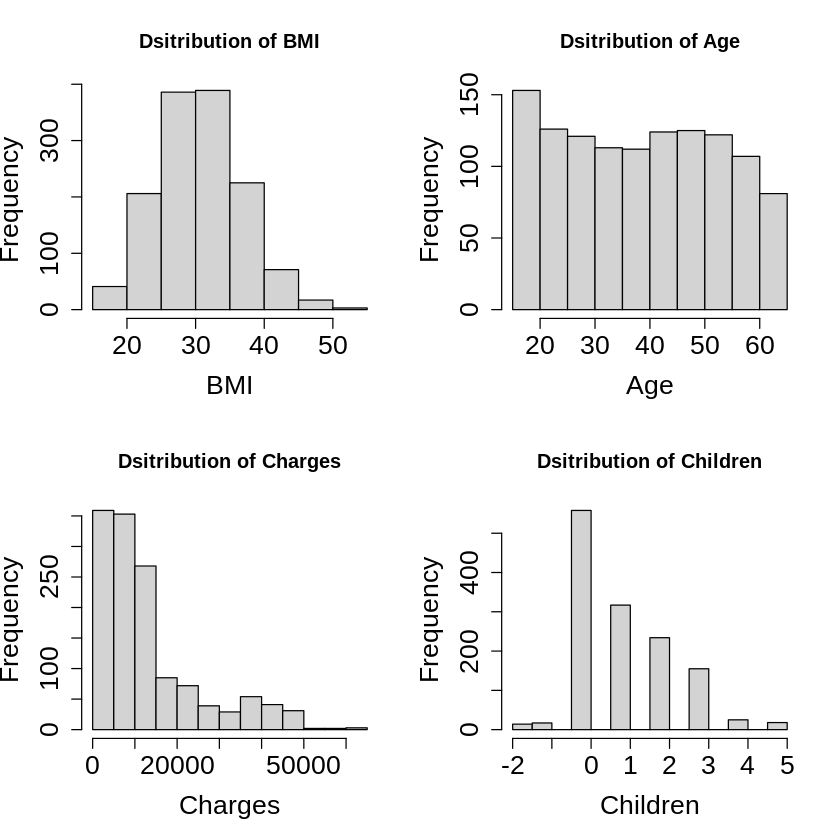

In [20]:
par(mfrow = c(2,2))
hist(df$bmi, xlab = "BMI", cex.axis = 1.6, cex.lab = 1.6, main = "Dsitribution of BMI")
hist(df$age, xlab = "Age", cex.axis = 1.6, cex.lab = 1.6, main = "Dsitribution of Age")
hist(df$charges, xlab = "Charges", cex.axis = 1.6, cex.lab = 1.6, main = "Dsitribution of Charges")
hist(df$children, xlab = "Children", cex.axis = 1.6, cex.lab = 1.6, main = "Dsitribution of Children")

##### Relationship Between Continuous Variables

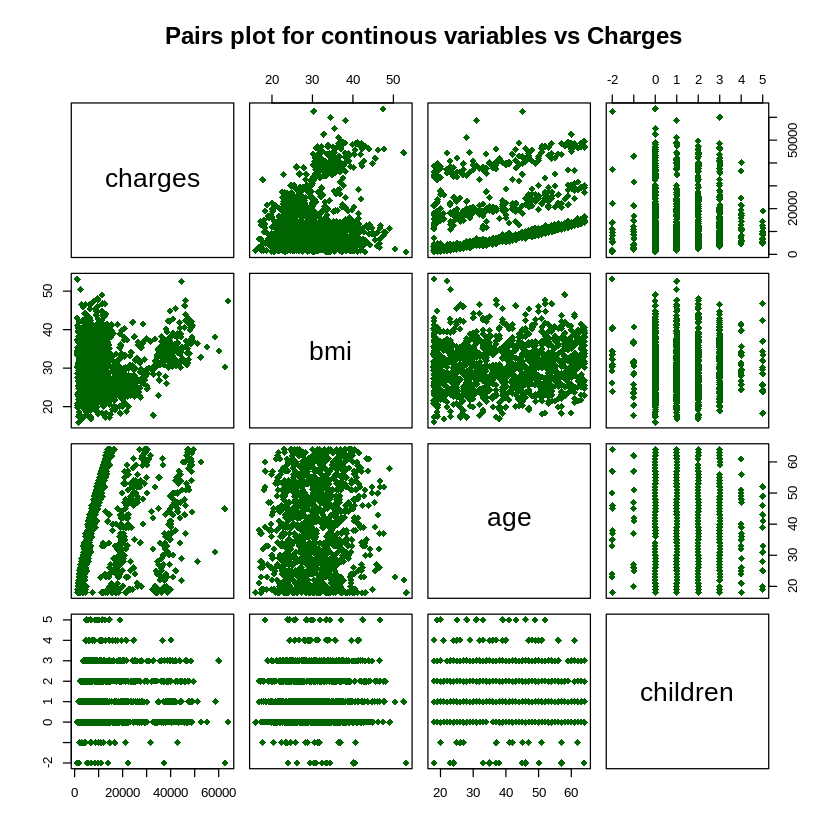

In [21]:
x <- cbind(charges,bmi,age,children) 
pairs(x,cex = 1.2, col = "darkgreen",pch = 18, 
      main = " Pairs plot for continous variables vs Charges")

##### Charge vs Categorival Variables

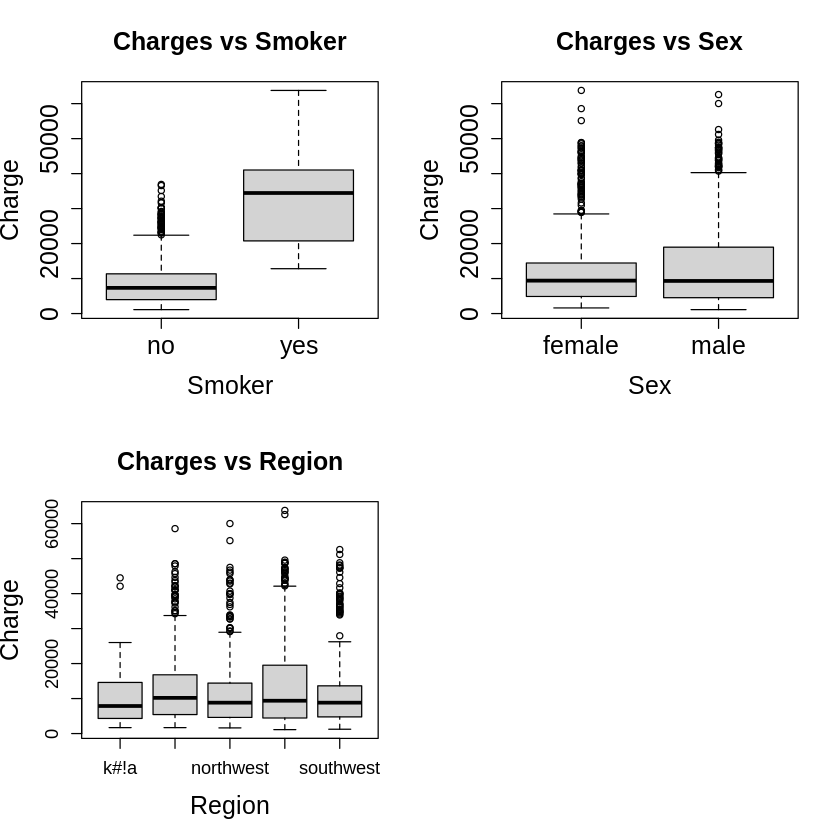

In [25]:
par(mfrow = c(2,2))
plot(df$charges ~ factor(df$smoker),ylab = "Charge",xlab = "Smoker",
     cex.axis = 1.5,cex.lab = 1.5,cex.main = 1.5,main = "Charges vs Smoker")
plot(df$charges ~ factor(df$sex),ylab = "Charge",xlab = "Sex",
     cex.axis = 1.5,cex.lab = 1.5,cex.main = 1.5,main = "Charges vs Sex")

plot(df$charges ~ factor(df$region),ylab = "Charge",xlab = "Region",
     cex.axis = 1.1,cex.lab = 1.5,cex.main = 1.5,main = "Charges vs Region")

##### Exploration Plots

Warning message:
“Removed 154 rows containing missing values (`geom_point()`).”


[1] "Legend label example: in-no means BMI in the normal range and does no smoke"


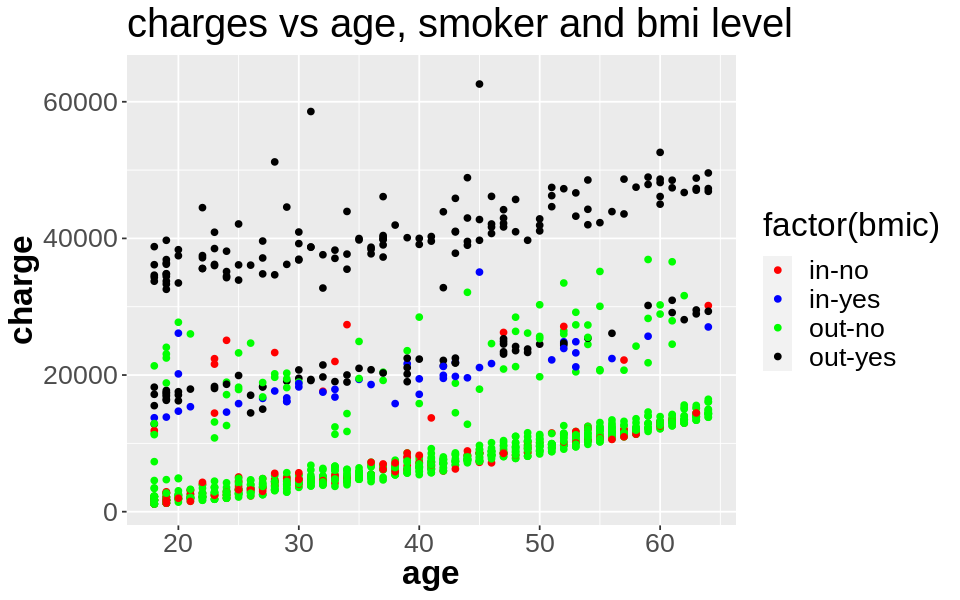

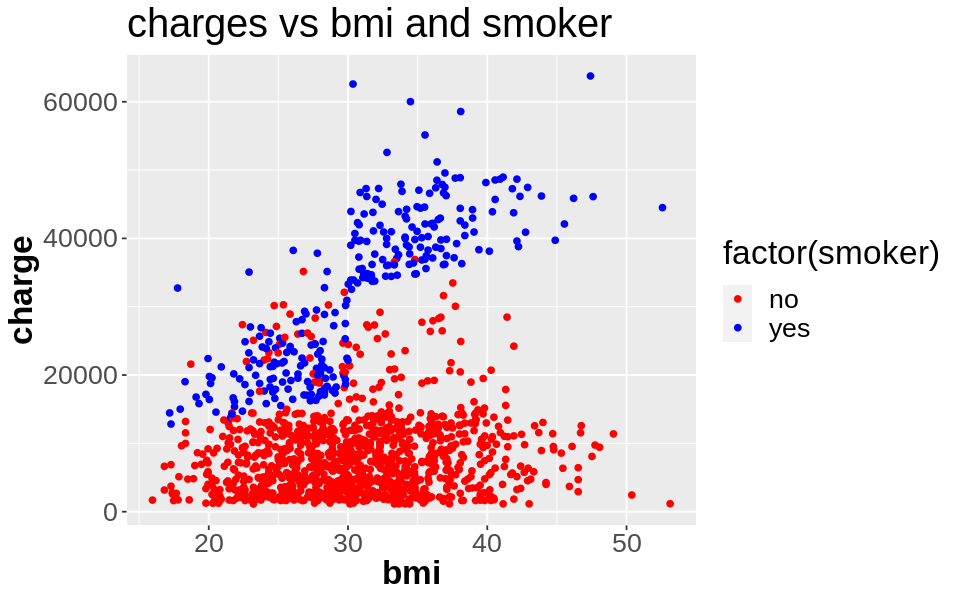

In [266]:
# Regroup by BMI (in normal range (18.5-24.9) or not) and smoker (yes or no)
bmismoke <- replace(bmi, (bmi > 24.9 | bmi < 18.5) & smoker == "yes", "out-yes")
bmismoke2 <- replace(bmismoke,(bmi > 24.9 | bmi < 18.5)& smoker == "no", "out-no")
bmismoke3 <- replace(bmismoke2,(bmi <= 24.9 & bmi >= 18.5) & smoker == "yes", "in-yes")
bmismoke4 <- replace(bmismoke3,(bmi <= 24.9 & bmi >= 18.5) & smoker == "no", "in-no")
df2 <- mutate(df, bmic = bmismoke4)

options(repr.plot.width = 8, repr.plot.height = 5)
sp<-ggplot(data = df2) +
  geom_point(aes(x = age, y = charges, group = 1,color = factor(bmic)))+
  ylab("charge") + xlab("age") + ggtitle("charges vs age, smoker and bmi level")
sp+scale_color_manual(values = c("red", "blue", "green","black"))+
theme (title = element_text(size = 20), 
axis.text = element_text(size = 16), 
axis.title = element_text(size = 20,face = "bold"),
legend.text = element_text(size = 16),
legend.title = element_text(size = 20))
print ("Legend label example: in-no means BMI in the normal range and does no smoke")

sp<-ggplot(data = df2) +
  geom_point(aes(x = bmi, y = charges, group = 1,color = factor(smoker)))+
  ylab("charge") + xlab("bmi") + ggtitle("charges vs bmi and smoker")
sp+scale_color_manual(values = c("red", "blue"))+
theme (title = element_text(size = 20), 
axis.text = element_text(size = 16), 
axis.title = element_text(size = 20,face = "bold"),
legend.text = element_text(size = 16),
legend.title = element_text(size = 20)) 
df2 <- df2[, 1:7]

# 4. Data Cleaning

In [109]:
# children: no non-integer imput
length(df2$children[df2$children%%1 != 0])
# number of negetive input: 31
sum(df2$children < 0)
df2$children[df2$children < 0]
# replace with positive values
df3 <- df2
df3$children[df3$children < 0] <- abs(df3$children[df3$children < 0]) 

# region: change k#!a to NA
table(df3$region)
df3$region <- replace(df3$region, df3$region == "k#!a", NA)  # replace k#!a as NA.

[1] 0

[1] 31

[1] -2 -1 -1 -1 -2 -1 -2 -2 -2 -1 -2 -1 -1 -1 -2 -2 -1 -2 -1 -1 -1 -1 -2 -1 -2
[26] -2 -1 -1 -2 -1 -2


     k#!a northeast northwest southeast southwest 
       24       317       317       349       320 

### Missing Data Distribution

[1] "Missing patterns and pencentages:"


[1] 1

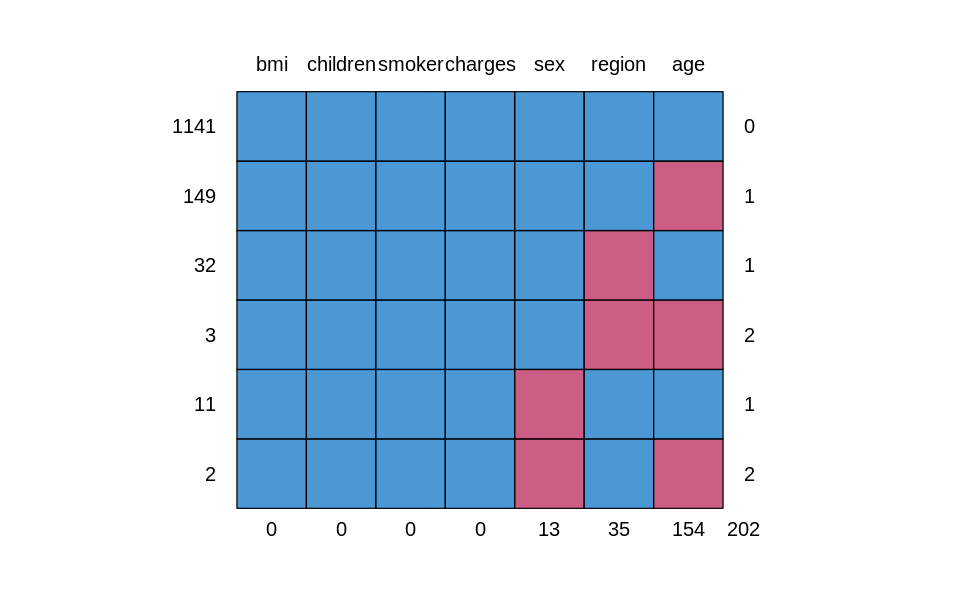


 Variables sorted by number of missings: 
 Variable       Count
      age 0.115097160
   region 0.026158445
      sex 0.009715994
      bmi 0.000000000
 children 0.000000000
   smoker 0.000000000
  charges 0.000000000


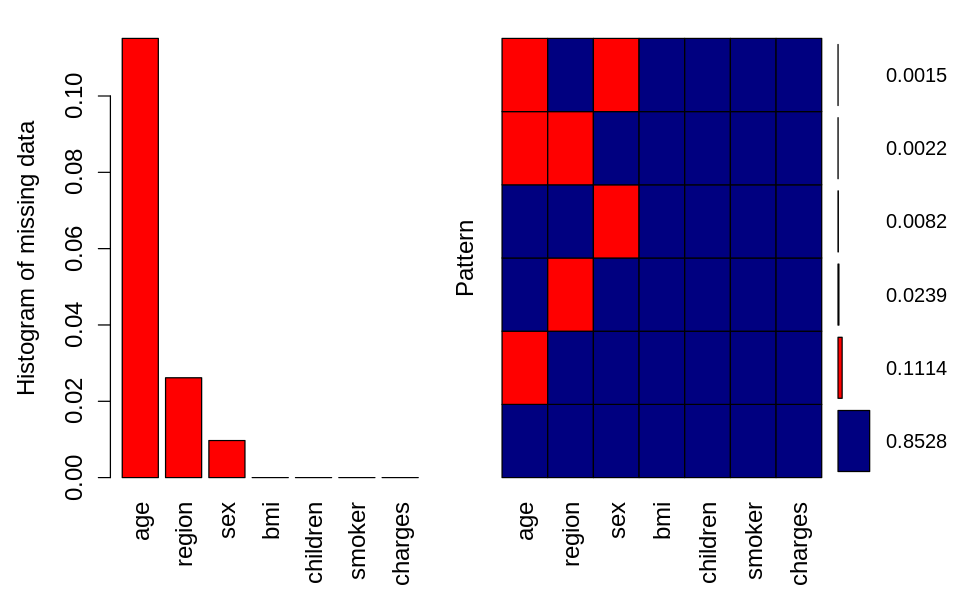

In [268]:
print("Missing patterns and pencentages:")
md.pattern(df3)[2]
aggr(df3, col = c('navyblue','red'), numbers = TRUE, sortVars = TRUE, 
     labels = names(df3), cex.axis = 1.2, gap = 3, ylab = c("Histogram of missing data","Pattern"))

### Data Imputation

In [ ]:
# age: impute using mice pmm
X <- df3[,-7]
tempData <- mice(X,m = 5,maxit = 50,meth = 'pmm',seed = 500)
completedData <- complete(tempData,2)
df4 <- cbind(completedData,df3[,7])

In [270]:
# sex: impute by bmi using logistic regression
g_imp1 = lm(df4$bmi ~ factor(df4$sex))
summary(g_imp1)

sex1 <- replace(df4$sex,df4$sex == 'female',1)
sex2 <- as.numeric(replace(sex1, sex1 == 'male',0))

g_imp2  =  glm(sex2 ~ df4$bmi,  family = binomial)
summary(g_imp2)

x_bmi <- df4$bmi[is.na(df4$sex)]
ilogit = function(x){exp(x)/(1+exp(x))}
prob = ilogit(g_imp2$coef[1] + g_imp2$coef[2] * x_bmi)
class <- replace(prob, prob >= 0.5,"female")
class <- replace(class, class < 0.5,"male")
df4$sex[is.na(df4$sex)] <- class


Call:
lm(formula = df4$bmi ~ factor(df4$sex))

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9782  -4.4436  -0.2636   3.9618  22.1918 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          30.3786     0.2370 128.200   <2e-16 ***
factor(df4$sex)male   0.5596     0.3342   1.674   0.0943 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.083 on 1323 degrees of freedom
  (13 observations deleted due to missingness)
Multiple R-squared:  0.002114,	Adjusted R-squared:  0.00136 
F-statistic: 2.803 on 1 and 1323 DF,  p-value: 0.09431



Call:
glm(formula = sex2 ~ df4$bmi, family = binomial)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)  0.453774   0.283064   1.603   0.1089  
df4$bmi     -0.015146   0.009058  -1.672   0.0945 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1836.8  on 1324  degrees of freedom
Residual deviance: 1834.0  on 1323  degrees of freedom
  (13 observations deleted due to missingness)
AIC: 1838

Number of Fisher Scoring iterations: 3


In [149]:
# region: impute with randomly selected levels based on level proportions
proportion <- ct/sum(table(df4$region))
set.seed(123)
rsample <- sample(c("northeast", "northwest", "southeast","southwest"), size = 35, replace = TRUE, prob = proportion)
df4$region[is.na(df4$region)] <- rsample
print("Cleaned Data:")
head(df4)

[1] "Cleaned Data:"


,age,sex,bmi,children,smoker,region,charges
,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,34,female,25.740,0,no,southeast,3756.622


# 5. Model Building

## Train-Test

In [150]:
# Split data, 20: 80
train_ind <- sample(1:1338, round(1338*0.8), replace = FALSE) 
train <- df4[train_ind, ] 
test <- df4[-train_ind, ] 

### Check Multicollinearity

In [151]:
# Correlation matrix
x_conti <- train[, c(1,3,4)] 
print("Correlation matrix") 
cor(x_conti)

[1] "Correlation matrix"


,age,bmi,children
age,1.00000000,0.11110738,0.04949966
bmi,0.11110738,1.00000000,0.03060749
children,0.04949966,0.03060749,1.00000000


### Fit Model

In [258]:
# Full model with 2-fi interaction
g1 <- lm(charges ~.^2, data = train)
# summary(g1)
Anova(g1,type = 3)

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),6.906871e+05,1,2.594952e-02,8.720551e-01
age,7.466618e+07,1,2.805252e+00,9.425787e-02
sex,1.493126e+07,1,5.609761e-01,4.540372e-01
bmi,5.411184e+06,1,2.033014e-01,6.521635e-01
children,1.430676e+08,1,5.375133e+00,2.061971e-02
smoker,2.555528e+09,1,9.601269e+01,9.702764e-22
region,4.068159e+07,3,5.094770e-01,6.758137e-01
age:sex,9.583867e+05,1,3.600715e-02,8.495379e-01
age:bmi,6.520795e+07,1,2.449901e+00,1.178377e-01


### Model Selection

In [263]:
# Keep sig. main and interaction terms (final model)
g2 <- lm(charges ~.- sex + bmi*smoker, data = train)
print ("Summary:")
summary(g2)

print("Baseline used")
contrasts(factor(train$smoker))
contrasts(factor(train$region))
#smoker baseline: no
#ref:northeast". 1-3:"northwest" "southeast" "southwest"

[1] "Summary:"



Call:
lm(formula = charges ~ . - sex + bmi * smoker, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-16075.1  -2101.3  -1337.2     -7.8  28800.5 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1448.76    1024.67  -1.414  0.15769    
age                240.33      11.33  21.212  < 2e-16 ***
bmi                 19.36      30.72   0.630  0.52869    
children           615.54     133.09   4.625 4.21e-06 ***
smokeryes       -20323.70    1961.68 -10.360  < 2e-16 ***
regionnorthwest   -759.00     447.43  -1.696  0.09011 .  
regionsoutheast  -1059.88     451.97  -2.345  0.01921 *  
regionsouthwest  -1459.21     460.86  -3.166  0.00159 ** 
bmi:smokeryes     1448.97      62.78  23.080  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5171 on 1061 degrees of freedom
Multiple R-squared:  0.8194,	Adjusted R-squared:  0.818 
F-statistic: 601.6 on 8 and 1061 DF,  p-value: < 2.

[1] "Baseline used"


,yes
no,0
yes,1


,northwest,southeast,southwest
northeast,0,0,0
northwest,1,0,0
southeast,0,1,0
southwest,0,0,1


[1] "ANOVA Table (type 3):"


,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),53461836,1,1.9990657,1.576895e-01
age,12033540142,1,449.9627865,1.581057e-83
bmi,10621596,1,0.3971668,5.286918e-01
children,572049376,1,21.3902915,4.208263e-06
smoker,2870559236,1,107.3370610,5.018181e-24
region,288977155,3,3.6018485,1.312145e-02
bmi:smoker,14246055459,1,532.6940148,7.804108e-96
Residuals,28374760033,1061,NA,NA


[1] "95% CI for the Estimates:"


,2.5 %,97.5 %
(Intercept),-3459.36777,561.84528
age,218.10226,262.56543
bmi,-40.92158,79.64447
children,354.38983,876.69312
smokeryes,-24172.91228,-16474.48980
regionnorthwest,-1636.94315,118.95221
regionsoutheast,-1946.73755,-173.02432
regionsouthwest,-2363.50625,-554.91906
bmi:smokeryes,1325.78588,1572.16005


[1] "Residual Plots"


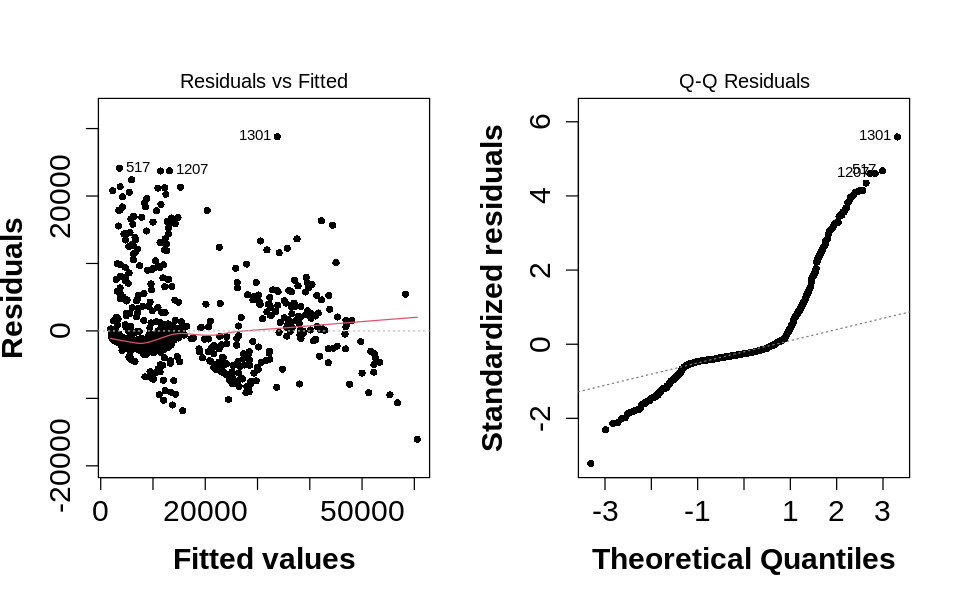

In [256]:
print ("ANOVA Table (type 3):")
Anova(g2,type = 3)
print ("95% CI for the Estimates:")
confint(g2) 
print ("Residual Plots")
layout(matrix(c(1,2), 1, 2, byrow = F)) 
plot(g2,1:2, col = "black", pch = 16, cex = 0.8, cex.axis = 1.5, 
cex.lab = 1.5, font.lab = 2.5)

In [216]:
# Compare with the main effect model
g3 <- lm(charges ~ .-sex, data = train)
summary(g3)
# Smoking increases the medical charge
# R^2 decreases from 0.82 to 0.73


Call:
lm(formula = charges ~ . - sex, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-19817  -3010  -1011   1600  28721 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11224.14    1142.98  -9.820  < 2e-16 ***
age                231.70      13.87  16.703  < 2e-16 ***
bmi                341.28      33.53  10.178  < 2e-16 ***
children           613.42     163.04   3.762 0.000177 ***
smokeryes        24030.70     482.36  49.819  < 2e-16 ***
regionnorthwest   -263.44     547.48  -0.481 0.630483    
regionsoutheast   -949.06     553.64  -1.714 0.086778 .  
regionsouthwest  -1196.45     564.38  -2.120 0.034243 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6335 on 1062 degrees of freedom
Multiple R-squared:  0.7287,	Adjusted R-squared:  0.7269 
F-statistic: 407.5 on 7 and 1062 DF,  p-value: < 2.2e-16


## Cross Validation

In [245]:
# Split data, 5 folds
index1 <- sample(1:1338, 268, replace=FALSE)
fold1 <- df4[index1, ]
fold1x <- fold1[, -7] 
rest1<- df4[-index1, ]

index2<-sample(1:1070, 268, replace=FALSE)
fold2 <- df4[index2, ]
fold2x <- fold2[, -7] 
rest2 <- rest1[-index2, ]

index3 <-sample(1:802,268,replace=FALSE) #80%
fold3 <- df4[index3, ]
fold3x <- fold3[, -7] 
rest3 <- rest2[-index3, ]

index4 <-sample(1:534,268,replace=FALSE) #80%
fold4 <- df4[index4, ]
fold4x <- fold4[, -7] 
rest4 <- rest3[-index4, ]

fold5 <- rest4 
fold5x <- rest4[, -7] 

trainf1 <- rbind(fold5,fold2,fold3,fold4)
trainf2 <- rbind(fold1,fold5,fold3,fold4)
trainf3 <- rbind(fold1,fold2,fold5,fold4)
trainf4 <- rbind(fold1,fold2,fold3,fold5)
trainf5 <- rbind(fold1,fold2,fold3,fold4)

### Fit and Select Model

In [246]:
gcv1 <- lm(charges~.^2, data = trainf1)
gcv12 <- lm(charges~. -sex + bmi*smoker, data = trainf1)
summary(gcv12)
# Anova(gcv12,type=3)
gcv2 <- lm(charges~.^2, data = trainf2)
gcv22 <- lm(charges~. -sex + bmi*smoker, data = trainf2)
summary(gcv22)
# Anova(gcv12,type=3)
gcv3 <- lm(charges~.^2, data = trainf3)
gcv32 <- lm(charges~. -sex + bmi*smoker, data = trainf3)
summary(gcv32)
# Anova(gcv12,type=3)
gcv4 <- lm(charges~.^2, data = trainf4)
gcv42 <- lm(charges~. -sex + bmi*smoker, data = trainf4)
summary(gcv42)
# Anova(gcv12,type=3)
gcv5 <- lm(charges~.^2, data = trainf5)
gcv52 <- lm(charges~. -sex + bmi*smoker, data = trainf5)
summary(gcv52)
# Anova(gcv12,type=3)


Call:
lm(formula = charges ~ . - sex + bmi * smoker, data = trainf1)

Residuals:
     Min       1Q   Median       3Q      Max 
-15914.4  -2168.6  -1404.9   -229.5  23284.3 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -2109.21    1039.05  -2.030  0.04261 *  
age                257.81      11.36  22.693  < 2e-16 ***
bmi                 24.12      31.46   0.767  0.44339    
children           416.10     136.97   3.038  0.00244 ** 
smokeryes       -21725.29    1994.22 -10.894  < 2e-16 ***
regionnorthwest   -360.84     462.62  -0.780  0.43557    
regionsoutheast   -810.55     463.19  -1.750  0.08042 .  
regionsouthwest  -1256.95     457.47  -2.748  0.00611 ** 
bmi:smokeryes     1469.28      63.64  23.086  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5263 on 1061 degrees of freedom
Multiple R-squared:  0.8155,	Adjusted R-squared:  0.8142 
F-statistic: 586.4 on 8 and 1061 DF,  p-value: <


Call:
lm(formula = charges ~ . - sex + bmi * smoker, data = trainf2)

Residuals:
     Min       1Q   Median       3Q      Max 
-11407.5  -2180.8  -1403.5   -121.4  29245.2 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -2085.24    1043.97  -1.997  0.04604 *  
age                247.29      11.48  21.546  < 2e-16 ***
bmi                 31.77      31.92   0.995  0.31987    
children           397.38     135.59   2.931  0.00345 ** 
smokeryes       -23357.57    2095.05 -11.149  < 2e-16 ***
regionnorthwest     53.26     472.89   0.113  0.91035    
regionsoutheast   -537.94     477.74  -1.126  0.26042    
regionsouthwest  -1212.25     457.65  -2.649  0.00820 ** 
bmi:smokeryes     1529.68      67.29  22.733  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5334 on 1061 degrees of freedom
Multiple R-squared:  0.8111,	Adjusted R-squared:  0.8097 
F-statistic: 569.4 on 8 and 1061 DF,  p-value: <


Call:
lm(formula = charges ~ . - sex + bmi * smoker, data = trainf3)

Residuals:
     Min       1Q   Median       3Q      Max 
-16319.5  -2193.7  -1431.3   -122.4  29395.8 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1892.31    1062.47  -1.781 0.075192 .  
age                243.92      11.39  21.418  < 2e-16 ***
bmi                 36.42      32.51   1.120 0.262863    
children           486.74     135.44   3.594 0.000341 ***
smokeryes       -21348.99    1983.62 -10.763  < 2e-16 ***
regionnorthwest   -550.59     464.90  -1.184 0.236548    
regionsoutheast   -987.98     464.90  -2.125 0.033807 *  
regionsouthwest  -1600.23     456.61  -3.505 0.000476 ***
bmi:smokeryes     1461.49      63.50  23.015  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5273 on 1061 degrees of freedom
Multiple R-squared:  0.8208,	Adjusted R-squared:  0.8195 
F-statistic: 607.5 on 8 and 1061 DF,  p-value: <


Call:
lm(formula = charges ~ . - sex + bmi * smoker, data = trainf4)

Residuals:
   Min     1Q Median     3Q    Max 
-16853  -2269  -1457    -74  29407 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1934.91    1055.23  -1.834 0.066988 .  
age                245.63      11.60  21.174  < 2e-16 ***
bmi                 37.03      31.99   1.158 0.247311    
children           505.57     138.68   3.646 0.000280 ***
smokeryes       -21903.59    2005.20 -10.923  < 2e-16 ***
regionnorthwest   -351.81     469.45  -0.749 0.453784    
regionsoutheast  -1022.62     481.40  -2.124 0.033879 *  
regionsouthwest  -1700.55     467.25  -3.639 0.000286 ***
bmi:smokeryes     1477.52      63.99  23.090  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5366 on 1061 degrees of freedom
Multiple R-squared:  0.8163,	Adjusted R-squared:  0.8149 
F-statistic: 589.3 on 8 and 1061 DF,  p-value: < 2.2e-16



Call:
lm(formula = charges ~ . - sex + bmi * smoker, data = trainf5)

Residuals:
     Min       1Q   Median       3Q      Max 
-15362.8  -2245.8  -1432.2   -232.9  29367.5 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -3151.67    1029.45  -3.062 0.002258 ** 
age                259.79      11.35  22.899  < 2e-16 ***
bmi                 58.99      31.43   1.877 0.060830 .  
children           459.40     135.52   3.390 0.000725 ***
smokeryes       -19956.84    1995.06 -10.003  < 2e-16 ***
regionnorthwest   -355.07     465.36  -0.763 0.445627    
regionsoutheast   -824.16     463.71  -1.777 0.075800 .  
regionsouthwest  -1551.76     454.63  -3.413 0.000666 ***
bmi:smokeryes     1408.35      63.88  22.047  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5257 on 1063 degrees of freedom
Multiple R-squared:  0.8116,	Adjusted R-squared:  0.8101 
F-statistic: 572.3 on 8 and 1063 DF,  p-value: <

### Root Mean Square Error (RMSE)

In [247]:
print("RMSE for 5 CV test folds")
pred1 <- predict(gcv12, fold1x, se.fit = FALSE)
round(sqrt(sum((pred1 - fold1[,7])^2)/268),2)
pred2 <- predict(gcv22, fold2x, se.fit = FALSE)
round(sqrt(sum((pred2 - fold2[,7])^2)/268),2)
pred3 <- predict(gcv32, fold3x, se.fit = FALSE)
round(sqrt(sum((pred3 - fold3[,7])^2)/268),2)
pred4 <- predict(gcv42, fold4x, se.fit = FALSE)
round(sqrt(sum((pred4 - fold4[,7])^2)/268),2)
pred5 <- predict(gcv52, fold5x, se.fit = FALSE)
round(sqrt(sum((pred5 - fold5[,7])^2)/266),2)

[1] "RMSE for 5 CV test folds"


[1] 5444.25

[1] 5180.27

[1] 5403.05

[1] 5029.03

[1] 5479.69

# 6. Summary
In this project, multiple linear regression, train-test, and cross validation procedures were used to build prediction models for medical charges of insured individuals with provided variables (age, bmi, children number, smoker, sex, region). The sex variable was found to be insignificant at $α = 0.05$, while other main and smoker/bmi interaction effects were found to be significant. The final model is shown in the equation below. The model fits the data well with $R^2=0.82$ and the model performance is quite consistent throughout different cross validation test folds. The smoker variable appears to be the most important variable for predicting medicare cost. Individuals who smoke tend to have higher medical cost considering both the main and interaction effects. Other variables including age, bmi, region, and children number are also significant. Individuals from Northeast with more children, higher BMI values, and higher ages are predicted to have higher healthcare charges.
$$\hat{charges} = -1448.76 + 240.33 \times age + 19.36 \times bmi + 615.54 \times children - 20323.70 * I_{ysmk} - 759 \times I_{nw} - 1059.88\times I_{se} -1459.21\times I_{sw} + 1448.97 \times I_{ysmk} \times bmi$$
Where $I_{ysmk}$ indicates smoking, $I_{nw}$, $I_{se}$, and $I_{sw}$ are the indicators that the individual is from the NW,SE, and SW of the US, respectively.
